# Generation Data — ENTSO-E Examples

Querying actual generation per type, renewable output, and installed capacity.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from entsoe import Client, country_name

client = Client()

## 1. Generation Mix — France (1 week)

In [2]:
start = "2024-06-01"
end = "2024-06-08"

df_gen = client.generation.actual(start, end, country="FR")
df_gen.head()

,timestamp,value,psr_type,quantity_unit
0,2024-05-31 22:00:00+00:00,345.0,Fossil Gas,MAW
1,2024-05-31 22:00:00+00:00,35814.0,Nuclear,MAW
2,2024-05-31 22:00:00+00:00,691.0,Wind Offshore,MAW
3,2024-05-31 22:00:00+00:00,194.0,Waste,MAW
4,2024-05-31 22:00:00+00:00,2024.0,Hydro Water Reservoir,MAW


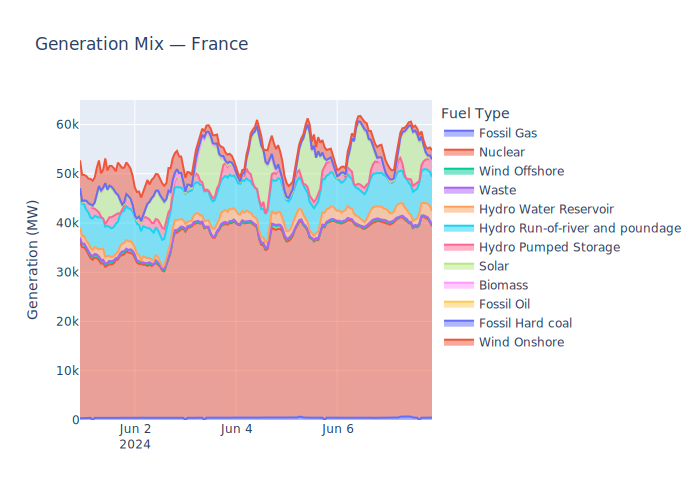

In [3]:
fig = px.area(
    df_gen, x="timestamp", y="value", color="psr_type",
    title="Generation Mix — France",
    labels={"value": "Generation (MW)", "timestamp": ""},
)
fig.update_layout(legend_title_text="Fuel Type")
fig.show()

## 2. Generation Share (Pie Chart)

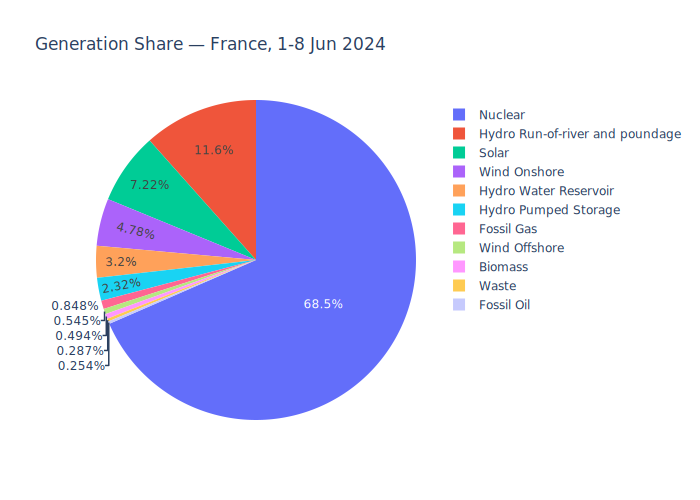

In [4]:
totals = df_gen.groupby("psr_type")["value"].sum().reset_index()
totals = totals[totals["value"] > 0]

fig = px.pie(
    totals, names="psr_type", values="value",
    title="Generation Share — France, 1-8 Jun 2024",
)
fig.show()

## 3. Solar vs Wind — Daily Patterns

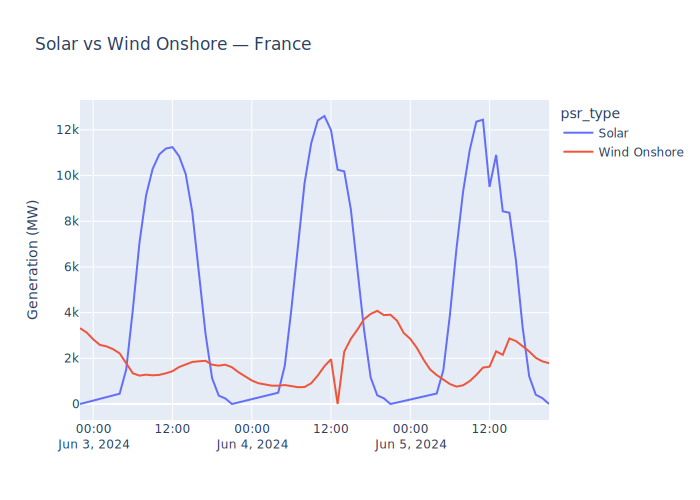

In [5]:
start = "2024-06-03"
end = "2024-06-06"

df_solar = client.generation.actual(start, end, country="FR", psr_type="solar")
df_wind = client.generation.actual(start, end, country="FR", psr_type="wind_onshore")

df_ren = pd.concat([df_solar, df_wind], ignore_index=True)

fig = px.line(
    df_ren, x="timestamp", y="value", color="psr_type",
    title="Solar vs Wind Onshore — France",
    labels={"value": "Generation (MW)", "timestamp": ""},
)
fig.show()

## 4. Wind & Solar Forecast vs Actual

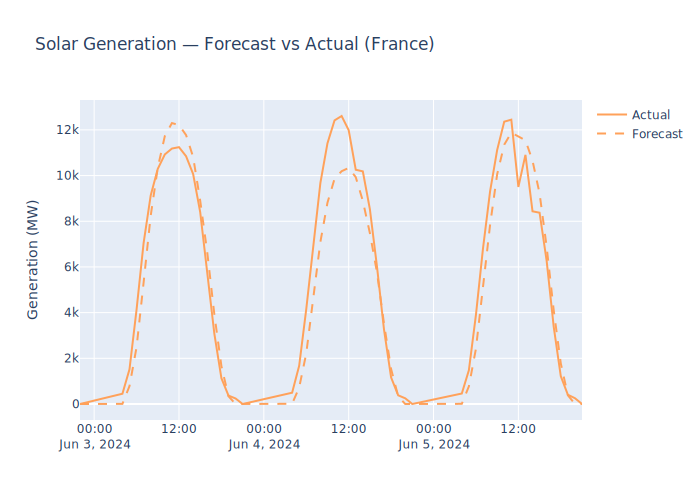

In [6]:
df_forecast = client.generation.forecast(start, end, country="FR")

# Compare solar
df_solar_fc = df_forecast[df_forecast["psr_type"] == "Solar"]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_solar["timestamp"], y=df_solar["value"],
    name="Actual", line=dict(color="#FFA15A"),
))
fig.add_trace(go.Scatter(
    x=df_solar_fc["timestamp"], y=df_solar_fc["value"],
    name="Forecast", line=dict(color="#FFA15A", dash="dash"),
))
fig.update_layout(
    title="Solar Generation — Forecast vs Actual (France)",
    yaxis_title="Generation (MW)",
    xaxis_title="",
)
fig.show()

## 5. Installed Capacity by Type

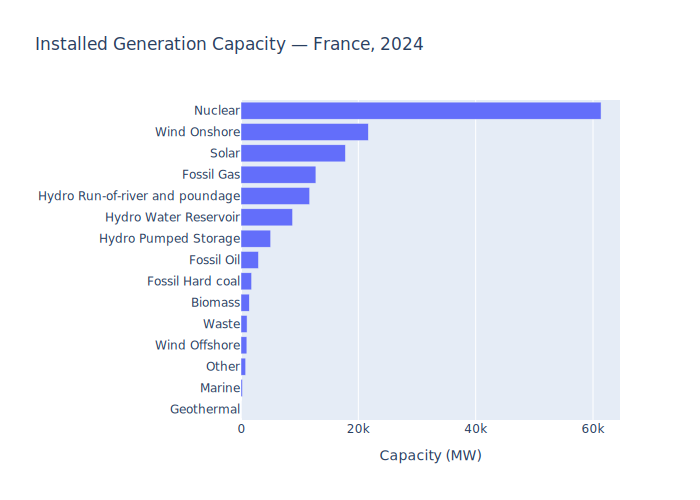

In [7]:
start = "2024-01-01"
end = "2024-12-31"

df_cap = client.generation.installed_capacity(start, end, country="FR")

latest = df_cap.sort_values("timestamp").groupby("psr_type").last().reset_index()
latest = latest[latest["value"] > 0].sort_values("value", ascending=True)

fig = px.bar(
    latest, x="value", y="psr_type", orientation="h",
    title="Installed Generation Capacity — France, 2024",
    labels={"value": "Capacity (MW)", "psr_type": ""},
)
fig.show()